In [15]:
#Libraries/Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [16]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("data/test_100.csv")

# Review the DataFrame
df.head()

,Unnamed: 0,Amount,Use Chip,Merchant State,Errors?,Is Fraud?,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,...,Has Chip,Cards Issued,International,Online,Age_at_transaction,income_to_debt,day_of_week,timestamp,time_of_day,distances
0,0,134.09,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,...,1,2,0,0,36,0.467789,6,1.030861e+09,Morning,0.000000
1,1,38.48,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,...,1,2,0,0,36,0.467789,6,1.030863e+09,Morning,33.540588
2,2,120.34,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,...,1,2,0,0,36,0.467789,0,1.030948e+09,Morning,33.540588
3,3,128.95,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,...,1,2,0,0,36,0.467789,0,1.030989e+09,Afternoon,33.540588
4,4,104.71,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,...,1,2,0,0,36,0.467789,1,1.031034e+09,Morning,0.000000


In [17]:
df['Is Fraud?'].value_counts()

Is Fraud?
0    1202369
1       1266
Name: count, dtype: int64

## Transformation of the data
Scaling and dummies

In [18]:
# Scale numerical values
# Identify features
binary_features = ['Has Chip', 'International', 'Online']
continuous_features = ['Amount', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Age_at_transaction', 'income_to_debt', 'timestamp', 'distances']
categorical_features = ['Errors?', 'Use Chip', 'Merchant State', 'day_of_week', 'time_of_day']

# Identify features
binary_features = ['Has Chip', 'International', 'Online']
continuous_features = ['Amount', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Age_at_transaction', 'income_to_debt', 'timestamp', 'distances']
categorical_features = ['Errors?', 'Use Chip', 'Merchant State', 'day_of_week', 'time_of_day']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # This will keep the binary features as they are
)

# Split data into features and target
X = df.drop(columns=['Is Fraud?'])  # Features
y = df['Is Fraud?']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with preprocessor and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


Confusion Matrix for Training Set:
[[961866      0]
 [  1042      0]]


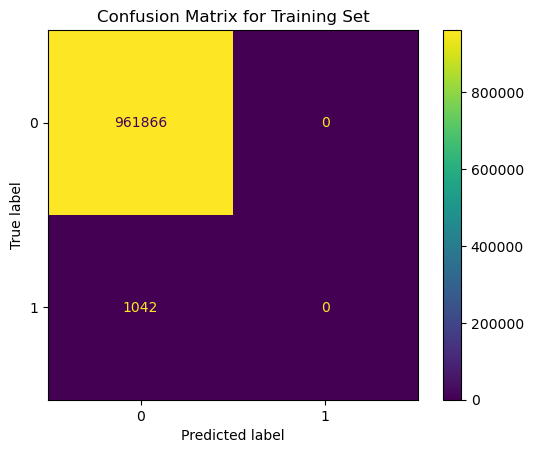

Confusion Matrix for Testing Set:
[[240503      0]
 [   224      0]]


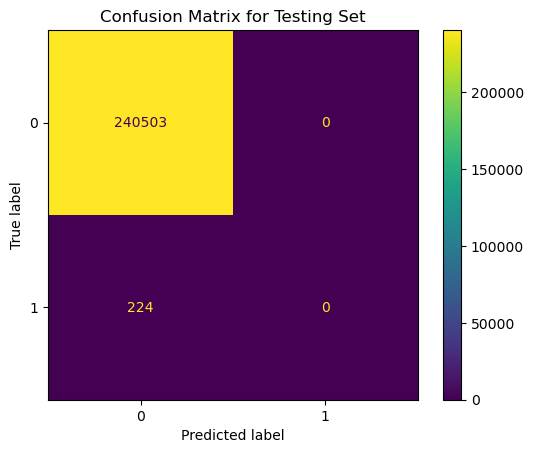

In [19]:
# Compute confusion matrix for training set
train_pred = pipeline.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, train_pred)

# Display confusion matrix for training set
print("Confusion Matrix for Training Set:")
print(train_conf_matrix)

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=pipeline.classes_)
disp_train.plot()
plt.title('Confusion Matrix for Training Set')
plt.show()

# Compute confusion matrix for testing set
test_pred = pipeline.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, test_pred)

# Display confusion matrix for testing set
print("Confusion Matrix for Testing Set:")
print(test_conf_matrix)

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=pipeline.classes_)
disp_test.plot()
plt.title('Confusion Matrix for Testing Set')
plt.show()

In [20]:
# Generate classification report for training set
train_classification_report = classification_report(y_train, train_pred)
print("Classification Report for Training Set:")
print(train_classification_report)

# Generate classification report for testing set
test_classification_report = classification_report(y_test, test_pred)
print("Classification Report for Testing Set:")
print(test_classification_report)

c:\Users\bosb0\anaconda3.1\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bosb0\anaconda3.1\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bosb0\anaconda3.1\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bosb0\anacond

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    961866
           1       0.00      0.00      0.00      1042

    accuracy                           1.00    962908
   macro avg       0.50      0.50      0.50    962908
weighted avg       1.00      1.00      1.00    962908

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240503
           1       0.00      0.00      0.00       224

    accuracy                           1.00    240727
   macro avg       0.50      0.50      0.50    240727
weighted avg       1.00      1.00      1.00    240727



c:\Users\bosb0\anaconda3.1\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bosb0\anaconda3.1\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    <...>,
    columns=["_", "_", "_", "_"]
)

# Copy the index column
<..._scaled>["<index>"] = <...>.index

# Set the Ticker column as index
<..._scaled> = <..._scaled>.set_index("<index>")

# Display sample data
<..._scaled>.head()

SyntaxError: invalid syntax (1749535400.py, line 3)

In [ ]:
# Get dummy data
<..._dummies> = pd.get_dummies(<df>[["1", '2', '3']])
oil_dummies.head()

In [ ]:
#Concatenate dfs
df_scaled = pd.concat([<1>, <2>], axis=1)

# Display the sample data
df_scaled.head()

In [ ]:
# Separate the y variable, the labels
y = df_scaled['Is Fraud?']

# Separate the X variable, the features
X = df_scaled.drop(columns=['Is Fraud?'])

## Split and train data

In [ ]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [ ]:
# Make a prediction using the testing data
training_predictions = lr_model.predict(X_train)
testing_predictions = logistic_regression_model.predict(X_test)

## Confusion matrices and Classification reports

Training set

In [ ]:
# Generate a confusion matrix for the model (training)
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)

In [ ]:
# Print the classification report for the model (training)
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

Test set

In [ ]:
# Generate a confusion matrix for the model (test)
testing_matrix = confusion_matrix(y_test, testing_predictions)
print(testing_matrix)

In [ ]:
# Print the classification report for the model (test)
testing_report = classification_report(y_test, testing_predictions)

# Print the training classification report
print(testing_report)

## Analysis of Linear Regression Model

- Compare training and test sets
- Analyse accuracy of test set; is this a viable model?